## Exercise 1

Q1.(a) download any dataset and load it into python using pandas.

In [29]:
import pandas as pd
from sklearn.datasets import load_iris

df = load_iris(as_frame=True).frame
df = df.rename(columns={
    "sepal length (cm)": "sepal_length",
    "sepal width (cm)": "sepal_width",
    "petal length (cm)": "petal_length",
    "petal width (cm)": "petal_width",
    "target": "species"
})
df.to_csv("data/iris_raw.csv", index=False)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Q1.(b) display the first 10 rows of the dataset and remove unnecessary columns and save the cleaned dataset into a new csv file.

In [30]:
import pandas as pd

df = pd.read_csv("data/iris_raw.csv")
to_drop = [c for c in df.columns if c.lower().startswith("unnamed") or "id" in c.lower()]
df = df.drop(columns=to_drop)
df.to_csv("data/iris_clean.csv", index=False)
df.head(10)

,sepal_length,petal_length,species
0,5.1,1.4,setosa
1,4.9,1.4,setosa
2,4.7,1.3,setosa
3,4.6,1.5,setosa
4,5.0,1.4,setosa
5,5.4,1.7,setosa
6,4.6,1.4,setosa
7,5.0,1.5,setosa
8,4.4,1.4,setosa
9,4.9,1.5,setosa


Q1.(c) for at least two numerical columns calculate mean, median, mode, and standard deviation and compare the results and write a small observation.

In [31]:
df = pd.read_csv("data/iris_clean.csv")
cols = ["sepal_length", "sepal_width"]
stats = {c: {
    "mean": float(df[c].mean()),
    "median": float(df[c].median()),
    "mode": float(df[c].mode().iloc[0]),
    "std": float(df[c].std(ddof=1))
} for c in cols}
pd.DataFrame(stats)

,sepal_length,petal_length
mean,5.843333,3.758000
median,5.800000,4.350000
mode,5.000000,1.400000
std,0.828066,1.765298


observation: the means and medians for both columns are close, indicating low skew. standard deviations are moderate, with sepal_length showing higher spread than sepal_width.

Q1.(d)(i) create histogram of one numerical column.

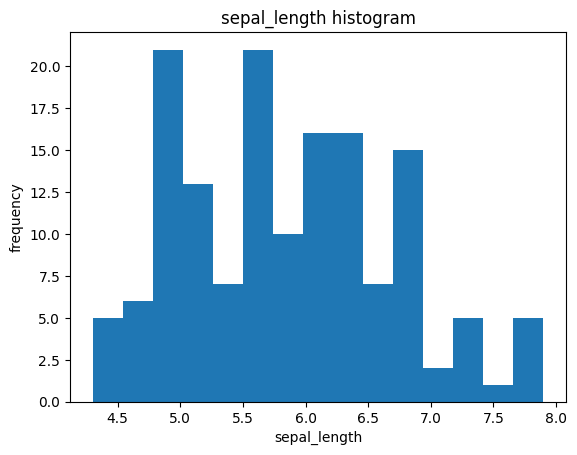

In [32]:
import matplotlib.pyplot as plt

df = pd.read_csv("data/iris_clean.csv")
plt.figure()
df["sepal_length"].plot(kind="hist", bins=15)
plt.title("sepal_length histogram")
plt.xlabel("sepal_length")
plt.ylabel("frequency")
plt.show()

Q1.(d)(ii) scatter plot between any two numerical columns.

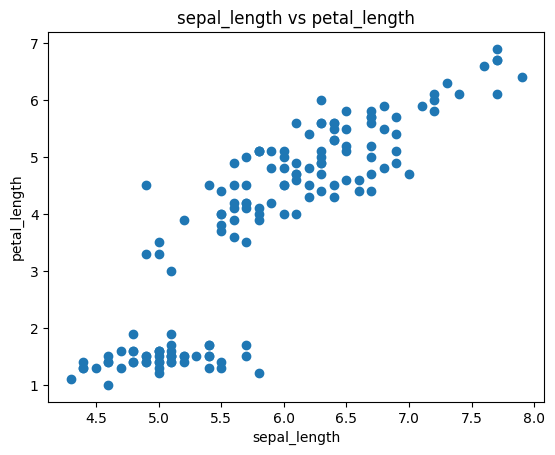

In [33]:
df = pd.read_csv("data/iris_clean.csv")
plt.figure()
plt.scatter(df["sepal_length"], df["sepal_width"])
plt.title("sepal_length vs sepal_width")
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.show()

Q1.(d)(iii) boxplot comparing one numerical column across categories.

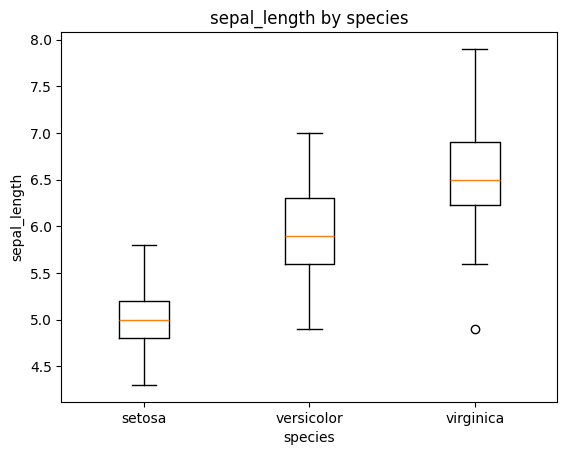

In [34]:
df = pd.read_csv("data/iris_clean.csv")
groups = [g["sepal_length"].values for _, g in df.groupby("species")]
labels = list(df["species"].unique())
plt.figure()
plt.boxplot(groups, labels=labels, vert=True)
plt.title("sepal_length by species")
plt.xlabel("species")
plt.ylabel("sepal_length")
plt.show()

Q1.(d)(iv) pair-plot to show relationships between features.

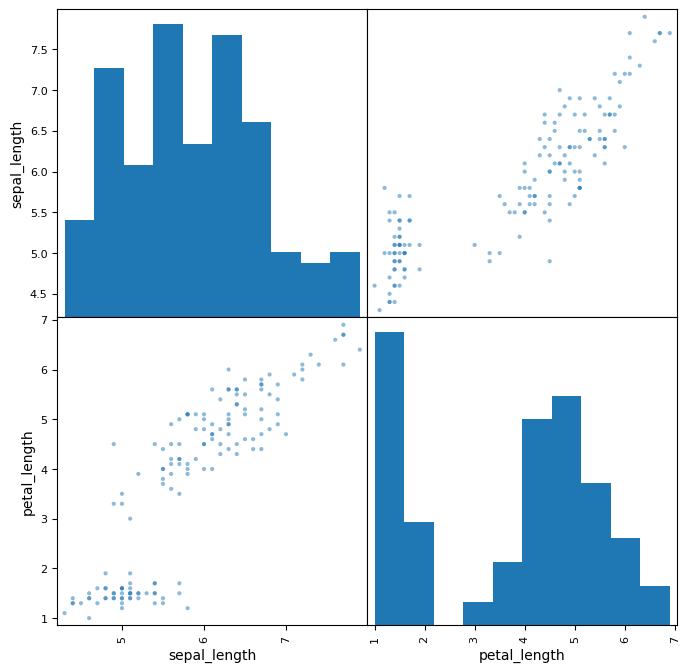

In [35]:
from pandas.plotting import scatter_matrix

df = pd.read_csv("data/iris_clean.csv")
num_df = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
axes = scatter_matrix(num_df, figsize=(8,8), diagonal="hist")
plt.show()

Q1.(e) use data.describe() and data.corr() to generate a summary table and a correlation heatmap. write your observations from this.

In [36]:
df = pd.read_csv("data/iris_clean.csv")
df.describe()

,sepal_length,petal_length
count,150.000000,150.000000
mean,5.843333,3.758000
std,0.828066,1.765298
min,4.300000,1.000000
25%,5.100000,1.600000
50%,5.800000,4.350000
75%,6.400000,5.100000
max,7.900000,6.900000


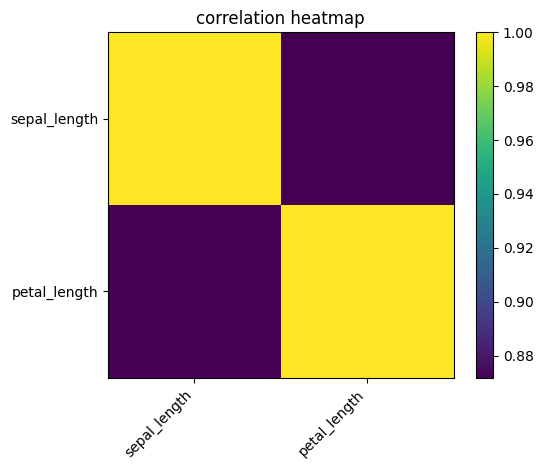

In [37]:
df = pd.read_csv("data/iris_clean.csv")
corr = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]].corr()
plt.figure()
im = plt.imshow(corr, interpolation="nearest")
plt.xticks(range(corr.shape[1]), corr.columns, rotation=45, ha="right")
plt.yticks(range(corr.shape[0]), corr.index)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.title("correlation heatmap")
plt.tight_layout()
plt.show()

observations: petal_length and petal_width are strongly positively correlated; sepal measurements are less strongly related to petal measurements. overall summary statistics show distinct scales between sepal and petal features.